# Project Information

It is a minor Analytics project for beginners to understand how to explore data to get some insights using python

- Library used - Pandas

- Data - https://raw.githubusercontent.com/arora123/Data/master/Automobile_data.csv

- Data Description - All column names are self explanatory

- Objectives -

Import automobile data set using Python Pandas to answer the following questions.

A. Is there any missing values in the data? If yes, drop the rows with missing values.

B. And answer the following question.
1. which are the cars with minimum or maximum price?
2. How many cars are there with different body-styles?
3. What is the average price of all body types of cars? Arrange them in descending order
4. What is the average price of cars by different companies? Arrange them in descending order
5. Count car types have diffeent number cylinders?

You can also use data visualization to explore the data.


Solution: Colab Notebook uploaded

Exploratory data analysis - Visualization / matplotlib

1. Company & price
2. Company & no of cylinders
3. Body type & price
4. Body type & cylinders
5. engine type & horse power


**LOADING THE DATASET**

In [ ]:
import pandas as pd
#df = pd.read_csv('/content/Automobile_data.csv')(we can even load it in this way by downloading the csv file into your system)
url = "https://raw.githubusercontent.com/arora123/Data/master/Automobile_data.csv"
df = pd.read_csv(url)
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


**A**

**CHECKING FOR MISSING VALUES AND DROPPING THEM**

In [ ]:
print("\nChecking for missing values:")
print(df.isnull().sum())
df_cleaned = df.dropna().copy()
print("\nShape of the dataset after dropping rows with missing values:")
print(df_cleaned.shape)


Checking for missing values:
index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

Shape of the dataset after dropping rows with missing values:
(58, 10)


**B**

**1. CARS WITH MINIMUM OR MAXIMUM PRICE**

In [ ]:
df_cleaned.loc[:, 'price'] = pd.to_numeric(df_cleaned['price'], errors='coerce')
min_price = df_cleaned['price'].min()
max_price = df_cleaned['price'].max()
print("\nCar(s) with the minimum price:")
print(df_cleaned[df_cleaned['price'] == min_price][['company', 'body-style', 'price']])
print("\nCar(s) with the maximum price:")
print(df_cleaned[df_cleaned['price'] == max_price][['company', 'body-style', 'price']])


Car(s) with the minimum price:
      company body-style   price
13  chevrolet  hatchback  5151.0

Car(s) with the maximum price:
          company body-style    price
35  mercedes-benz    hardtop  45400.0


**2. COUNTING CARS WITH DIFFERENT BODY STYLES**

In [ ]:
print("\nNumber of different body styles in each and every company given in data set")
distinct_body_styles=df_cleaned.groupby('company')['body-style'].nunique()
print(distinct_body_styles)


Number of different body styles in each and every company given in data set
company
alfa-romero      2
audi             2
bmw              1
chevrolet        2
dodge            1
honda            2
isuzu            1
jaguar           1
mazda            2
mercedes-benz    3
mitsubishi       2
nissan           2
porsche          2
toyota           2
volkswagen       1
volvo            2
Name: body-style, dtype: int64


**3. Average price of all body types of cars. Arranging them in descending order**

In [ ]:
avg_price_by_body_style = df_cleaned.groupby('body-style')['price'].mean()
avg_price_by_body_style_sorted = avg_price_by_body_style.sort_values(ascending=False)
print("\nAverage price of all body types of cars (sorted in descending order):")
print(avg_price_by_body_style_sorted)


Average price of all body types of cars (sorted in descending order):
body-style
hardtop        39714.000000
convertible    22341.000000
sedan          17706.333333
wagon          12730.111111
hatchback       7159.571429
Name: price, dtype: float64


**4. Average price of cars by different companies. Arranging them in descending order**

In [ ]:
avg_price_by_company = df_cleaned.groupby('company')['price'].mean()
avg_price_by_company_sorted = avg_price_by_company.sort_values(ascending=False)
print("\nAverage price of cars by different companies (sorted in descending order):")
print(avg_price_by_company_sorted)


Average price of cars by different companies (sorted in descending order):
company
porsche          35528.000000
mercedes-benz    35040.000000
jaguar           34600.000000
bmw              27213.333333
audi             16392.500000
alfa-romero      15498.333333
volvo            13177.500000
honda            10195.000000
mazda             9654.800000
volkswagen        8435.000000
nissan            8289.000000
toyota            8216.857143
isuzu             6785.000000
mitsubishi        6689.000000
dodge             6303.000000
chevrolet         6007.000000
Name: price, dtype: float64


**5. Count of car types having diffeent number of cylinders**

In [ ]:
print("\nCount of car types with different numbers of cylinders:")
print(df_cleaned['num-of-cylinders'].value_counts())


Count of car types with different numbers of cylinders:
num-of-cylinders
four      37
six       11
five       5
eight      2
three      1
twelve     1
two        1
Name: count, dtype: int64


**DATA VISUALIZATION**

**COMPANY & PRICE**

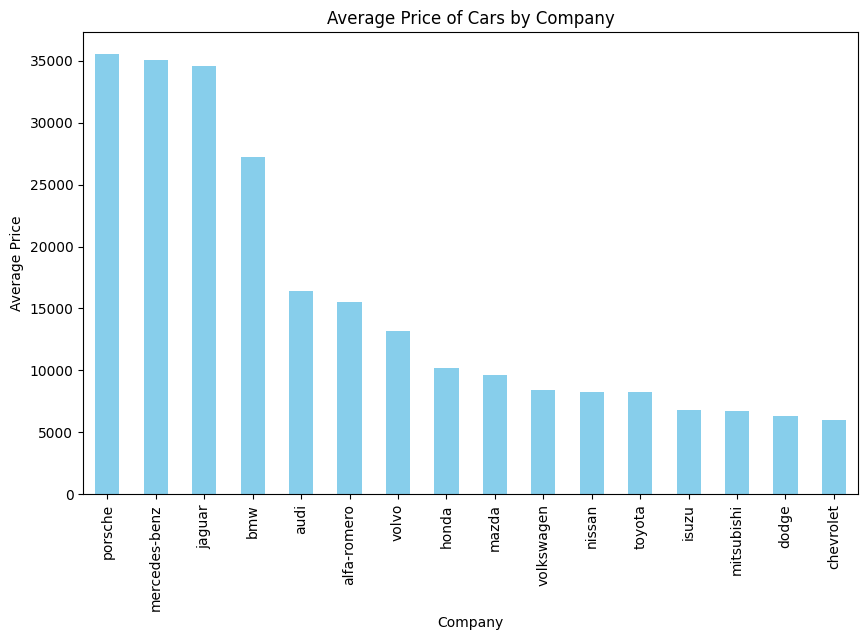

In [ ]:
import matplotlib.pyplot as plt
avg_price_by_company = df_cleaned.groupby('company')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_by_company.plot(kind='bar', color='skyblue')
plt.title('Average Price of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

**COMPANY & NO.OF CYLINDERS**

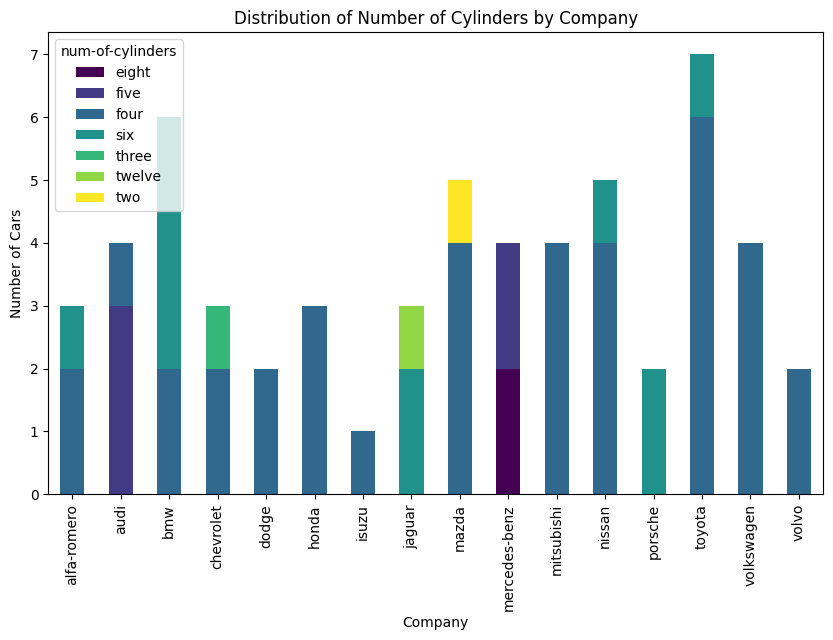

In [ ]:
cylinders_by_company = df_cleaned.groupby('company')['num-of-cylinders'].value_counts().unstack().fillna(0)
cylinders_by_company.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribution of Number of Cylinders by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

**BODY TYPE & PRICE**

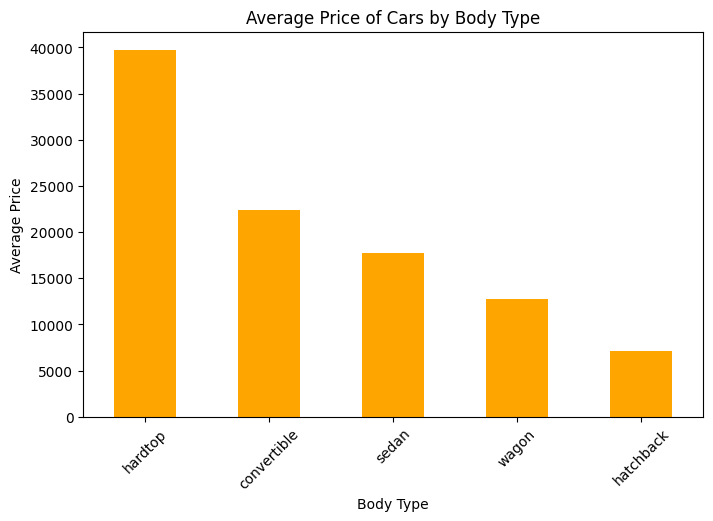

In [ ]:
avg_price_by_body_style = df_cleaned.groupby('body-style')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_price_by_body_style.plot(kind='bar', color='orange')
plt.title('Average Price of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

**BODY TYPE & CYLINDERS**

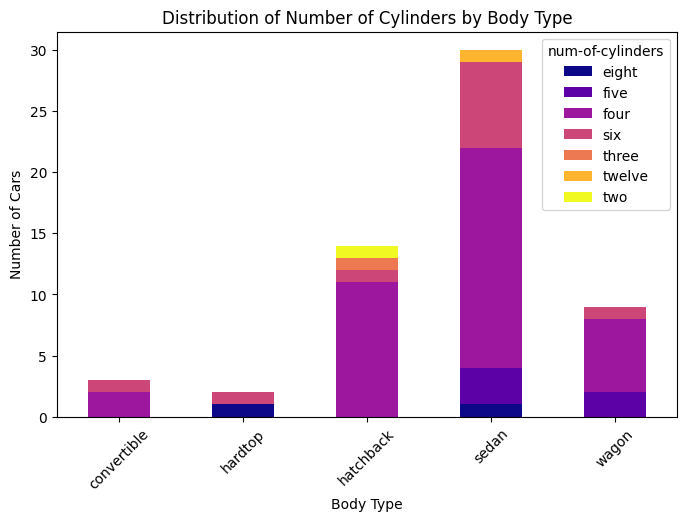

In [ ]:
cylinders_by_body_style = df_cleaned.groupby('body-style')['num-of-cylinders'].value_counts().unstack().fillna(0)
cylinders_by_body_style.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='plasma')
plt.title('Distribution of Number of Cylinders by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

**ENGINE TYPE & HORSE POWER**

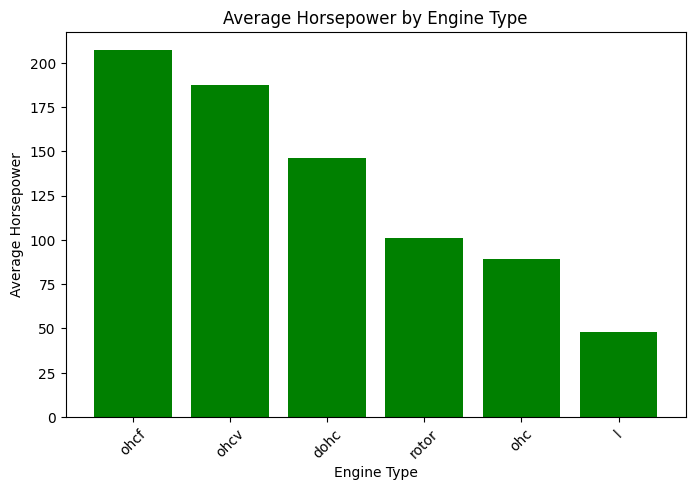

In [ ]:
avg_hp_by_engine_type = df_cleaned.groupby('engine-type')['horsepower'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(avg_hp_by_engine_type.index, avg_hp_by_engine_type, color='green')
plt.title('Average Horsepower by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Horsepower')
plt.xticks(rotation=45)
plt.show()